<a href="https://colab.research.google.com/github/annisaast/IDCamp2024/blob/main/data-analysis-and-dashboard-project/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: bike-sharing-dataset
- **Nama:** Annisaa' Sha'idatut Taqiyah
- **Email:** annisaashaidatut19@gmail.com
- **ID Dicoding:** annisaast

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana minat masyarakat terhadap fasilitas penyewaan sepeda pada tahun 2011-2012?
- Pertanyaan 2 : Bagaimana demografi rata-rata pengguna fasilitas penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Mengumpulkan Data hour_df
hour_df = pd.read_csv('https://raw.githubusercontent.com/annisaast/ProyekDataAnalisis/main/submission/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Mengumpulkan Data day_df
day_df = pd.read_csv('https://raw.githubusercontent.com/annisaast/ProyekDataAnalisis/main/submission/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data Pengguna Bike Sharing terdiri atas data per hari dan per jam.
- Perbedaan kedua data adalah tidak adanya data hr pada data pengguna Bike Sharing per hari.

### Assessing Data

In [4]:
# Menilai Tabel hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [6]:
print('Jumlah duplikasi: ', hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# Menilai Tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [10]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat 17379 data untuk dataset hour dan 731 data untuk dataset day.
- Kedua data memiliki hasil assessing data yang sama, yaitu tidak adanya missing value, duplicate data, dan inaccurate value.
- Kesalahan kedua data ada pada data 'dteday' dengan tipa data object yang mana seharusnya berupa tipa data datetime.

### Cleaning Data

In [12]:
# Membersihkan tabel hour_df
# Memperbaiki tipe data
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengecek hasil perbaikan tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [13]:
# Membersihkan tabel day_df
# Memperbaiki tipe data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengecek hasil perbaikan tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Data 'dteday' dengan tipa data object sudah diubah menjadi tipa data datetime.

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [14]:
# Rangkuman Parameter Statistik dari Data hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [15]:
# Demografi Pengguna per Jam Berdasarkan Bulan dan Tahun
hour_df['month_year'] = hour_df['dteday'].dt.to_period('M')
hour_df.groupby(by='month_year').agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,instant,casual,registered,cnt
month_year,,,,
2011-01,688,3073,35116,38189
2011-02,649,6242,41973,48215
2011-03,730,12826,51219,64045
2011-04,719,22346,72524,94870
2011-05,744,31050,104771,135821
2011-06,720,30612,112900,143512
2011-07,744,36452,104889,141341
2011-08,731,28842,107849,136691
2011-09,717,26545,100873,127418


In [16]:
# Demografi Pengguna per Jam Berdasarkan Musim Tiap Tahun
hour_df['season_year'] = hour_df['dteday'].dt.to_period('Y').astype(str) + '-' + hour_df['season'].astype(str)
hour_df.groupby(by='season_year').agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,instant,casual,registered,cnt
season_year,,,,
2011-1,2068,21425,128575,150000
2011-2,2203,77564,269752,347316
2011-3,2240,95450,324200,419650
2011-4,2134,52813,273324,326137
2012-1,2174,39197,282151,321348
2012-2,2206,125958,445315,571273
2012-3,2256,130641,510838,641479
2012-4,2098,76969,438507,515476


In [17]:
# Demografi Pengguna per Jam Berdasarkan Tanggal
hour_df['month_year'] = hour_df['dteday'].dt.date
hour_df.groupby(by='month_year').agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,instant,casual,registered,cnt
month_year,,,,
2011-01-01,24,331,654,985
2011-01-02,23,131,670,801
2011-01-03,22,120,1229,1349
2011-01-04,23,108,1454,1562
2011-01-05,23,82,1518,1600
...,...,...,...,...
2012-12-27,24,247,1867,2114
2012-12-28,24,644,2451,3095
2012-12-29,24,159,1182,1341


In [18]:
# Demografi Pengguna per Jam Berdasarkan Kondisi Cuaca
hour_df.groupby(by='weathersit').agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,instant,casual,registered,cnt
weathersit,,,,
1,11413,462745,1875428,2338173
2,4544,134481,661471,795952
3,1419,22783,135548,158331
4,3,8,215,223


In [19]:
display(hour_df[hour_df['weathersit'] == 4])

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_year,season_year
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36,2011-01-26,2011-1
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164,2012-01-09,2012-1
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23,2012-01-21,2012-1


In [20]:
# Demografi Pengguna per Jam Berdasarkan Musim Kondisi Cuaca
hour_df.groupby(by=['season','weathersit']).agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered     cnt
season weathersit                                     
1      1              2665   44462      280816  325278
       2              1205   14760      109445  124205
       3               369    1392       20250   21642
       4                 3       8         215     223
2      1              2859  151197      513266  664463
       2              1144   44912      162451  207363
       3               406    7413       39350   46763
3      1              3280  174014      627927  801941
       2               947   42350      170582  212932
       3               269    9727       36529   46256
4      1              2609   93072      453419  546491
       2              1248   32459      218993  251452
       3               375    4251       39419   43670

In [21]:
# Demografi Pengguna per Jam Berdasarkan Hari dalam Seminggu
hour_df.groupby(by='weekday').agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,instant,casual,registered,cnt
weekday,,,,
0,2502,140521,303506,444027
1,2479,70784,384719,455503
2,2453,57843,411266,469109
3,2475,57319,415729,473048
4,2471,61460,423935,485395
5,2487,78238,409552,487790
6,2512,153852,323955,477807


In [22]:
# Demografi Pengguna per Jam Berdasarkan Hari Kerja
hour_df.groupby(by='workingday').agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,instant,casual,registered,cnt
workingday,,,,
0,5514,316732,683537,1000269
1,11865,303285,1989125,2292410


In [23]:
# Demografi Pengguna per Jam Berdasarkan Hari dalam Seminggu dan Hari Kerja
hour_df.groupby(by=['workingday', 'weekday']).agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered     cnt
workingday weekday                                     
0          0           2502  140521      303506  444027
           1            357   16760       42845   59605
           2             23     440         573    1013
           3             24    2562        4841    7403
           4             48    1515        2405    3920
           5             48    1082        5412    6494
           6           2512  153852      323955  477807
1          1           2122   54024      341874  395898
           2           2430   57403      410693  468096
           3           2451   54757      410888  465645
           4           2423   59945      421530  481475
           5           2439   77156      404140  481296

### Explore `day_df`

In [24]:
# Rangkuman Parameter Statistik dari Data day_df
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [25]:
# Demografi Pengguna per Jam Berdasarkan Bulan dan Tahun
day_df['month_year'] = day_df['dteday'].dt.to_period('M')
day_df.groupby(by='month_year').agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,instant,casual,registered,cnt
month_year,,,,
2011-01,31,3073,35116,38189
2011-02,28,6242,41973,48215
2011-03,31,12826,51219,64045
2011-04,30,22346,72524,94870
2011-05,31,31050,104771,135821
2011-06,30,30612,112900,143512
2011-07,31,36452,104889,141341
2011-08,31,28842,107849,136691
2011-09,30,26545,100873,127418


In [26]:
# Demografi Pengguna Berdasarkan Bulan dan Tahun
day_df['month_year'] = day_df['dteday'].dt.to_period('M')
day_df.groupby(by='month_year').agg({
    'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,instant,casual,registered,cnt
month_year,,,,
2011-01,31,3073,35116,38189
2011-02,28,6242,41973,48215
2011-03,31,12826,51219,64045
2011-04,30,22346,72524,94870
2011-05,31,31050,104771,135821
2011-06,30,30612,112900,143512
2011-07,31,36452,104889,141341
2011-08,31,28842,107849,136691
2011-09,30,26545,100873,127418


In [27]:
# Demografi Pengguna Berdasarkan Musim
day_df.groupby(by='season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [28]:
# Demografi Pengguna Berdasarkan Kondisi Cuaca
day_df.groupby(by='weathersit').agg({
    # 'instant': 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


In [29]:
# Demografi Pengguna Berdasarkan Musim Kondisi Cuaca
day_df.groupby(by=['season','weathersit']).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

casual  registered     cnt
season weathersit                            
1      1            41562      270474  312036
       2            18779      136794  155573
       3              281        3458    3739
2      1           146388      480598  626986
       2            56714      231382  288096
       3              420        3087    3507
3      1           167945      631498  799443
       2            56407      194272  250679
       3             1739        9268   11007
4      1            90451      429036  519487
       2            37876      264634  302510
       3             1455       18161   19616

In [30]:
# Demografi Pengguna Berdasarkan Hari dalam Seminggu
day_df.groupby(by='weekday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


In [31]:
# Demografi Pengguna Berdasarkan Hari Kerja
day_df.groupby(by='workingday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [32]:
# Demografi Pengguna Berdasarkan Tipe Pengguna
user_type = day_df[['casual', 'registered', 'cnt']].sum()
user_type

,0
casual,620017
registered,2672662
cnt,3292679


In [33]:
# Rata-rata temp, atemp, hum, winspeed
day_df['month_year'] = day_df['dteday'].dt.to_period('M')
condition = day_df.groupby(by='month_year').agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})
# Mengalikan dengan pengali sesuai
condition['temp'] *= 41
condition['atemp'] *= 50
condition['hum'] *= 100
condition['windspeed'] *= 67

condition = condition.round(2)
# Menampilkan hasil
condition

,temp,atemp,hum,windspeed
month_year,,,,
2011-01,8.11,10.22,58.44,13.09
2011-02,11.58,14.22,56.01,15.31
2011-03,13.60,16.26,56.94,15.57
2011-04,19.32,22.84,66.83,16.36
2011-05,23.67,27.54,71.34,12.15
2011-06,28.42,32.33,59.32,11.94
2011-07,31.10,35.53,58.97,11.50
2011-08,28.92,32.77,62.68,12.78
2011-09,25.13,28.43,78.41,10.25


**Insight:**
Untuk periode Januari 2011 - Desember 2012, diketahui bahwa
- Setiap bulannya, jumlah pengguna sepeda tidak menentu, tidak cenderung naik dan tidak cenderung turun.
- Urutan jumlah pengguna sepeda paling banyak berdasarkan musim adalah musim gugur, musim panas, musim dingin, dan musim semi.
- Berdasarkan hari dalam seminggu, jumlah pengguna sepeda tidak jauh berbeda untuk antar harinya.
- Jumlah tipe pengguna registered jauh lebih banyak dibandingkan jumlah tipe pengguna casual.
- Pengguna sepeda ketika cuaca buruk sangat sedikit yang selama 223 jam jika dibandingkan dengan kondisi cuaca yang lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana minat masyarakat terhadap fasilitas penyewaan sepeda pada tahun 2011-2012?

<ipython-input-34-7679b880b101>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


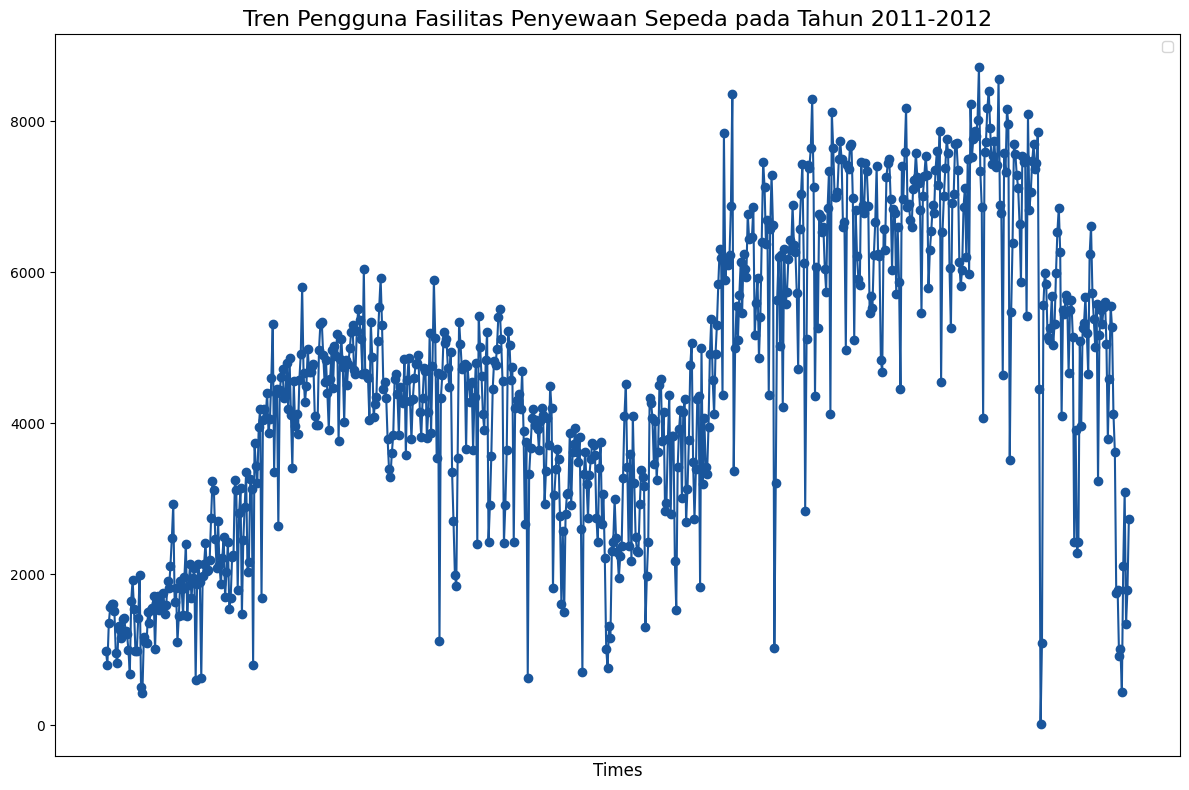

In [34]:
# Tren Pengguna per Hari
# Agregasi data
day_agg_data = day_df.groupby(by='dteday').agg({
    'cnt': 'sum'
}).reset_index()

# Mengubah month_year menjadi tipe string untuk memudahkan plotting
day_agg_data['dteday'] = day_agg_data['dteday'].astype(str)

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Membuat plot garis dengan matplotlib
# plt.plot(day_agg_data['dteday'], day_agg_data['cnt'], label='Total Count', marker='o', color='#1a569c')
plt.plot(day_agg_data['dteday'], day_agg_data['cnt'], marker='o', color='#1a569c')

# Menambahkan label untuk axis dan judul
plt.title('Tren Pengguna Fasilitas Penyewaan Sepeda pada Tahun 2011-2012', fontsize=16)
plt.xlabel('Times', fontsize=12)
# plt.ylabel('Jumlah', fontsize=12)

# Menambahkan rotasi pada label x-axis agar mudah dibaca
plt.xticks([])

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-35-4242f9b4c5a7>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


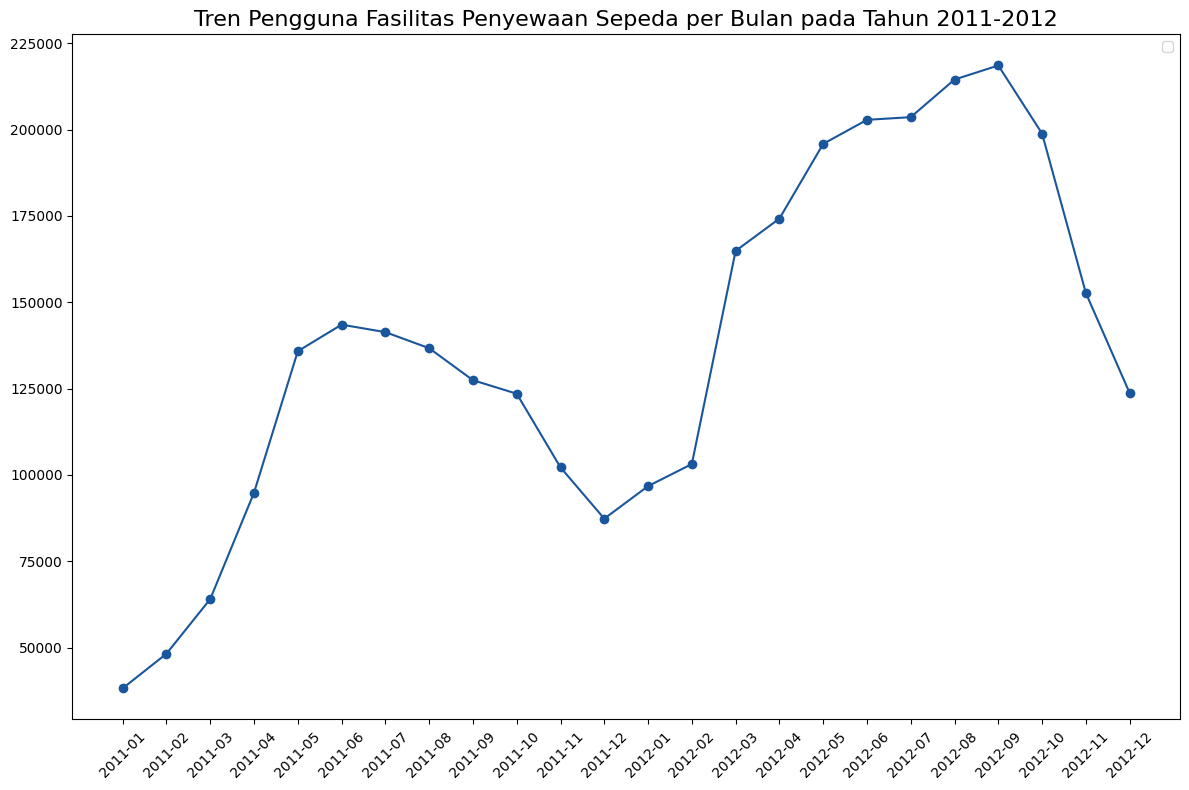

In [35]:
# Tren Pengguna per Bulan selama 2 Tahun (2011-2012)
# Agregasi data
day_agg_data = day_df.groupby(by='month_year').agg({
    'cnt': 'sum'
}).reset_index()

# Mengubah month_year menjadi tipe string untuk memudahkan plotting
day_agg_data['month_year'] = day_agg_data['month_year'].astype(str)

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Membuat plot garis dengan matplotlib
# plt.plot(day_agg_data['month_year'], day_agg_data['cnt'], label='Total Count', marker='o', color='#1a569c')
plt.plot(day_agg_data['month_year'], day_agg_data['cnt'], marker='o', color='#1a569c')

# Menambahkan label untuk axis dan judul
plt.title('Tren Pengguna Fasilitas Penyewaan Sepeda per Bulan pada Tahun 2011-2012', fontsize=16)
# plt.xlabel('Times', fontsize=12)
# plt.ylabel('Jumlah', fontsize=12)

# Menambahkan rotasi pada label x-axis agar mudah dibaca
plt.xticks(rotation=45)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-36-13a77fc2683e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data_2011['month'] = agg_data_2011['month_year'].apply(lambda x: pd.to_datetime(x).strftime('%b'))


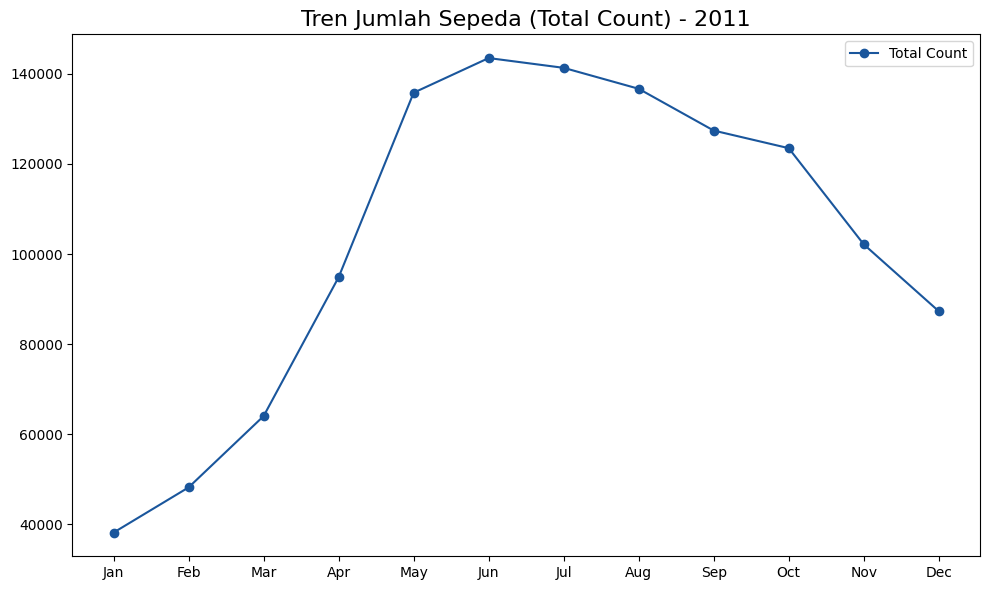

<ipython-input-36-13a77fc2683e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data_2012['month'] = agg_data_2012['month_year'].apply(lambda x: pd.to_datetime(x).strftime('%b'))


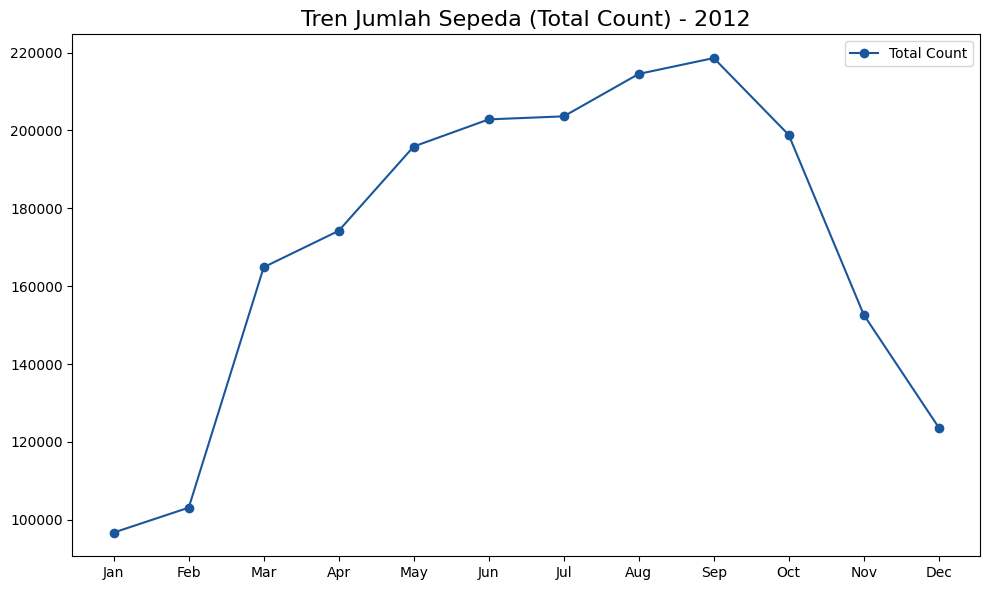

In [36]:
# Tren Pengguna per Bulan untuk masing-masing Tahun
# Menggunakan format tanggal yang sesuai
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['month_year'] = day_df['dteday'].dt.to_period('M')

# Agregasi data
agg_data = day_df.groupby(by='month_year').agg({
    'cnt': 'sum'
}).reset_index()

# Mengubah month_year menjadi tipe string untuk memudahkan plotting
agg_data['month_year'] = agg_data['month_year'].astype(str)

# Filter data untuk tahun 2011 dan 2012
agg_data_2011 = agg_data[agg_data['month_year'].str.startswith('2011')]
agg_data_2012 = agg_data[agg_data['month_year'].str.startswith('2012')]

# Membuat figure pertama untuk tahun 2011
plt.figure(figsize=(10, 6))
plt.plot(agg_data_2011['month_year'], agg_data_2011['cnt'], label='Total Count', marker='o', color='#1a569c')
plt.title('Tren Jumlah Sepeda (Total Count) - 2011', fontsize=16)

# Mengubah format label sumbu X untuk hanya menampilkan bulan
agg_data_2011['month'] = agg_data_2011['month_year'].apply(lambda x: pd.to_datetime(x).strftime('%b'))
plt.xticks(ticks=range(len(agg_data_2011)), labels=agg_data_2011['month'])

plt.legend()
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()  # Menampilkan figure pertama


# Membuat figure kedua untuk tahun 2012
plt.figure(figsize=(10, 6))  # Membuat figure kedua
plt.plot(agg_data_2012['month_year'], agg_data_2012['cnt'], label='Total Count', marker='o', color='#1a569c')
plt.title('Tren Jumlah Sepeda (Total Count) - 2012', fontsize=16)

# Mengubah format label sumbu X untuk hanya menampilkan bulan
agg_data_2012['month'] = agg_data_2012['month_year'].apply(lambda x: pd.to_datetime(x).strftime('%b'))
plt.xticks(ticks=range(len(agg_data_2012)), labels=agg_data_2012['month'])

plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 2 : Bagaimana demografi rata-rata pengguna fasilitas penyewaan sepeda?

#### Berdasarkan Bulan-Tahun

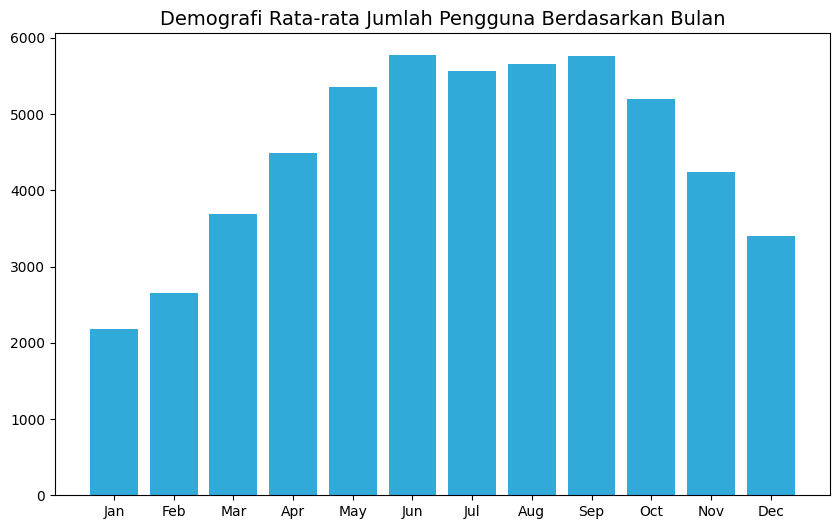

In [37]:
# Demografi Rata-Rata Pengguna Berdasarkan Bulan
month_type = day_df.groupby(by='mnth').agg({
    'cnt': 'mean'  # Jumlah pengguna per bulan
}).reset_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(month_names, month_type['cnt'],  color='#32aad9')
ax.set_title('Demografi Rata-rata Jumlah Pengguna Berdasarkan Bulan', fontsize=14)

plt.show()

year     2011    2012
month                
1       38189   96744
2       48215  103137
3       64045  164875
4       94870  174224
5      135821  195865
6      143512  202830
7      141341  203607
8      136691  214503
9      127418  218573
10     123511  198841
11     102167  152664
12      87323  123713


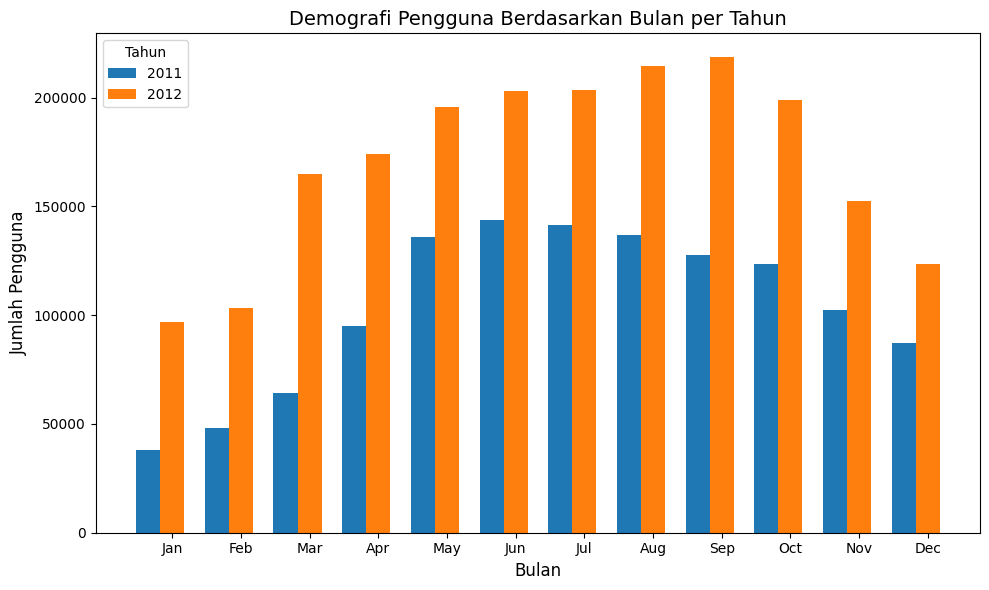

In [38]:
# Demografi Pengguna Berdasarkan Bulan per Tahun
# Menambahkan kolom bulan dan tahun
day_df['month'] = day_df['dteday'].dt.month
day_df['year'] = day_df['dteday'].dt.year

# Agregasi data per bulan dan tahun
month_type = day_df.groupby(by=['year', 'month']).agg({
    'cnt': 'sum'  # Jumlah pengguna per bulan
}).reset_index()

# Membuat pivot table agar lebih mudah dalam plotting
month_pivot = month_type.pivot_table(index='month', columns='year', values='cnt', aggfunc='sum')

# Memeriksa struktur month_pivot
print(month_pivot)

# Mendapatkan bulan dan tahun yang unik
months = month_pivot.index
years = month_pivot.columns

# Mendefinisikan nama bulan sesuai dengan urutan
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Menyiapkan posisi dan lebar bar
index = np.arange(len(months))
bar_width = 0.35

# Menyiapkan plot
fig, ax = plt.subplots(figsize=(10, 6))

# Menggambar bar untuk setiap tahun
for i, year in enumerate(years):
    ax.bar(index + i * bar_width, month_pivot[year], bar_width, label=str(year))

# Menambahkan label dan judul
ax.set_title('Demografi Pengguna Berdasarkan Bulan per Tahun', fontsize=14)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('Jumlah Pengguna', fontsize=12)

# Mengatur label sumbu X menjadi nama bulan
ax.set_xticks(index + bar_width)  # Menyesuaikan posisi label
ax.set_xticklabels(month_names)  # Ganti angka dengan nama bulan

# Menambahkan legenda
ax.legend(title='Tahun', loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Berdasarkan Musim

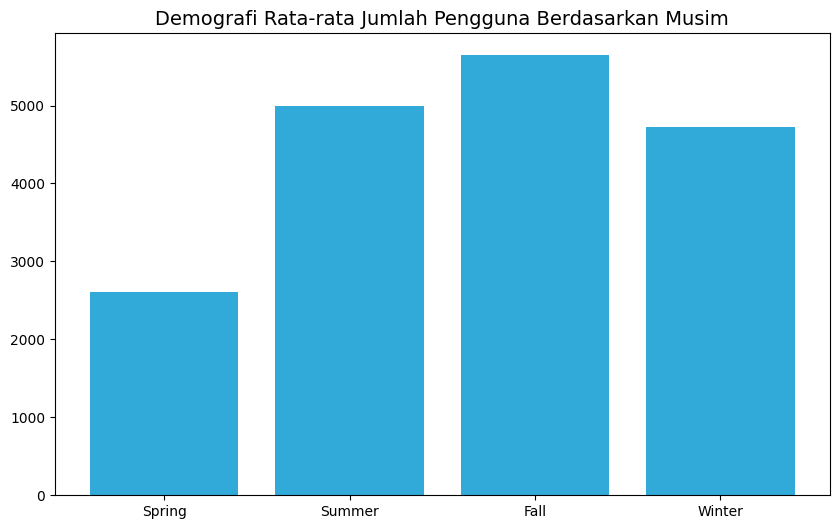

In [39]:
# Demografi Rata-Rata Pengguna Berdasarkan Musim
season_type = day_df.groupby(by='season').agg({
    'cnt': 'mean'
}).reset_index()

season_names = ['Spring', 'Summer', 'Fall', 'Winter']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(season_names, season_type['cnt'],  color='#32aad9')
ax.set_title('Demografi Rata-rata Jumlah Pengguna Berdasarkan Musim', fontsize=14)

plt.show()

year      2011    2012
season                
1       150000  321348
2       347316  571273
3       419650  641479
4       326137  515476


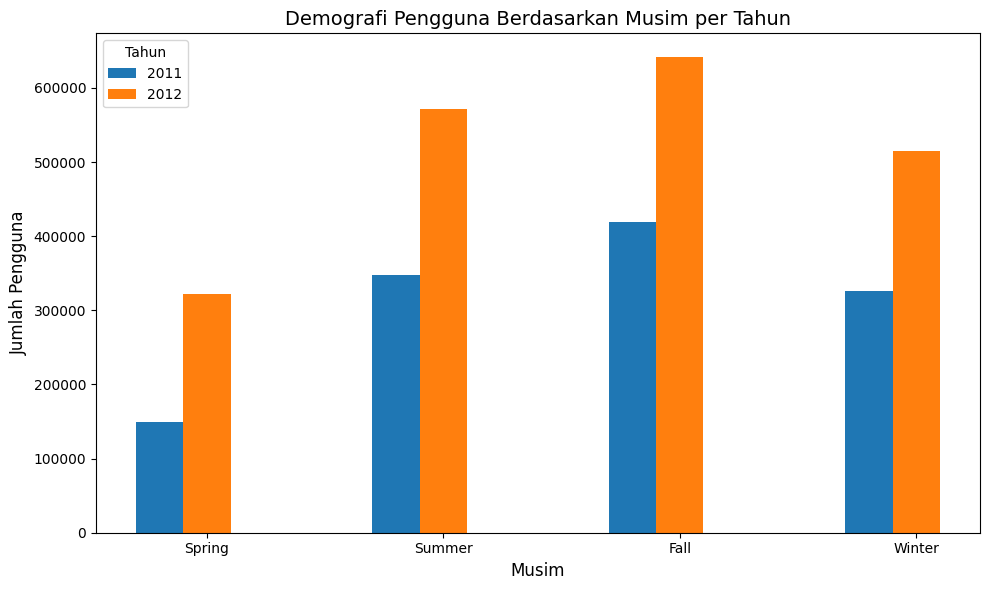

In [40]:
# Demografi Pengguna Berdasarkan Musim per Tahun
day_df['year'] = day_df['dteday'].dt.to_period('Y')
season_type = day_df.groupby(by=['year','season']).agg({
    'cnt' : 'sum'
}).reset_index()

# Membuat pivot table agar lebih mudah dalam plotting
season_pivot = season_type.pivot_table(index='season', columns='year', values='cnt', aggfunc='sum')

# Memeriksa struktur season_pivot
print(season_pivot)

# Mendapatkan musim (seasons) dan tahun (years) yang unik
seasons = season_pivot.index
years = season_pivot.columns

# Mendefinisikan nama musim sesuai dengan urutan
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

# Menyiapkan posisi dan lebar bar
index = np.arange(len(seasons))
bar_width = 0.2

# Menyiapkan plot
fig, ax = plt.subplots(figsize=(10, 6))

# Menggambar bar untuk setiap tahun
for i, year in enumerate(years):
    ax.bar(index + i * bar_width, season_pivot[year], bar_width, label=str(year))

# Menambahkan label dan judul
ax.set_title('Demografi Pengguna Berdasarkan Musim per Tahun', fontsize=14)
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Jumlah Pengguna', fontsize=12)

# Mengatur label sumbu X menjadi nama musim
ax.set_xticks(index + bar_width)  # Menyesuaikan posisi label
ax.set_xticklabels(season_names)  # Ganti angka dengan nama musim

# Menambahkan legenda
ax.legend(title='Tahun', loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Berdasarkan Hari

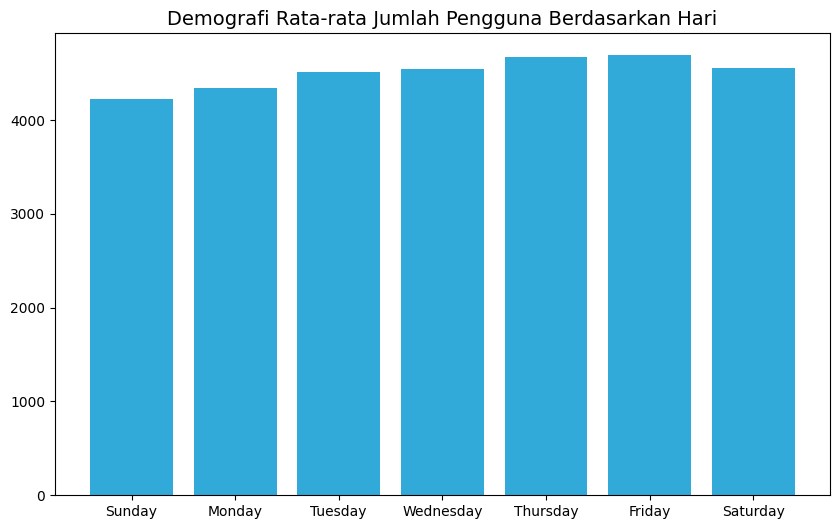

In [41]:
# Demografi Rata-Rata Pengguna Berdasarkan Hari dalam Seminggu (Bar Chart)
weekday_type = day_df.groupby(by='weekday').agg({
    'cnt': 'mean'
}).reset_index()

weekday_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(weekday_names, weekday_type['cnt'],  color='#32aad9')
ax.set_title('Demografi Rata-rata Jumlah Pengguna Berdasarkan Hari', fontsize=14)

plt.show()

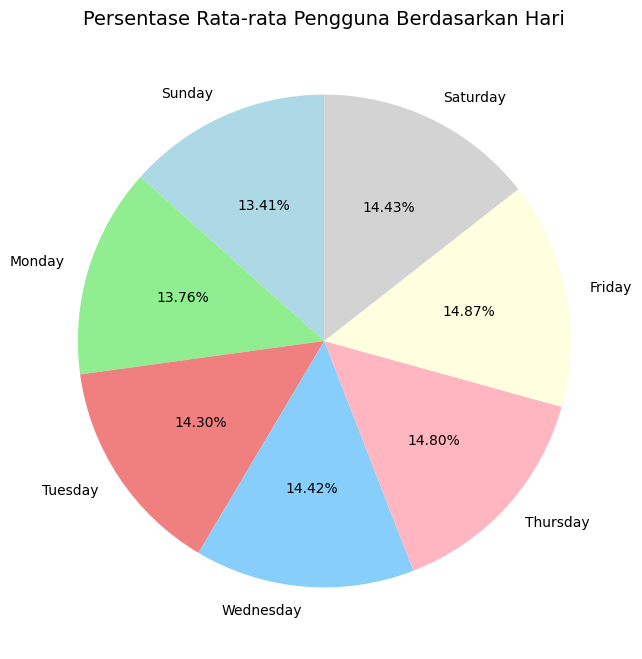

In [42]:
# Persentase Rata-rata Pengguna Berdasarkan Hari
weekday_type = day_df.groupby(by='weekday').agg({
    'cnt': 'mean'
}).reset_index()

# Menyiapkan label dan data untuk pie chart
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sizes = weekday_type['cnt']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgray'])

# Menambahkan judul
plt.title('Persentase Rata-rata Pengguna Berdasarkan Hari', fontsize=14)

# Menampilkan pie chart
plt.show()


#### Berdasarkan Tipe Hari Kerja

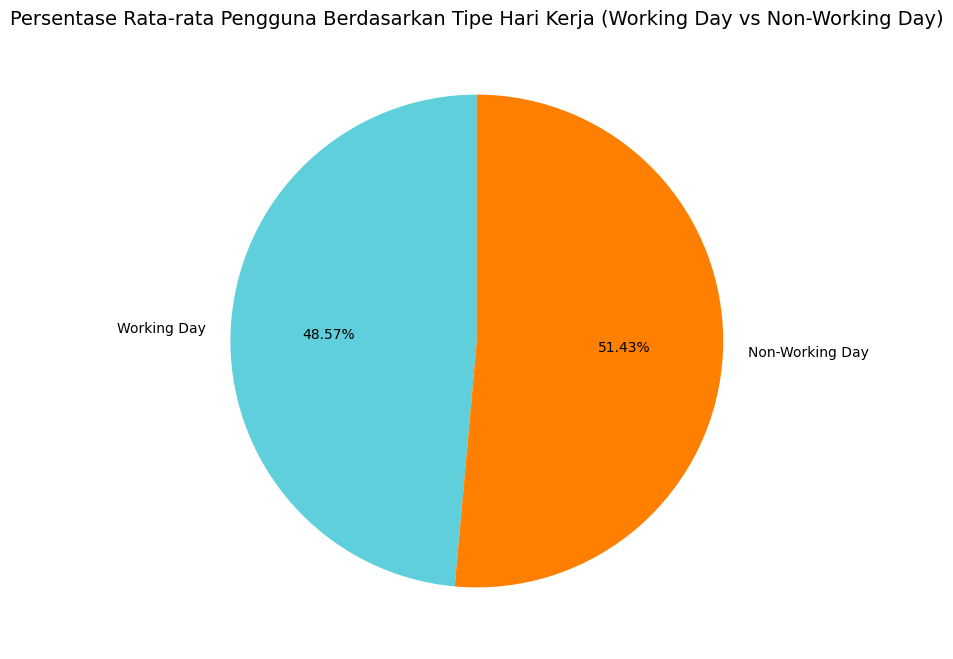

In [43]:
# Persentase Rata-rata Pengguna Berdasarkan Tipe Hari Kerja
working_type = day_df.groupby(by='workingday').agg({
    'cnt': 'mean'
}).reset_index()

# Menyiapkan label dan data untuk pie chart
labels = ['Working Day', 'Non-Working Day']
sizes = working_type['cnt']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#5fd0db', '#ff8001'])

# Menambahkan judul
plt.title('Persentase Rata-rata Pengguna Berdasarkan Tipe Hari Kerja (Working Day vs Non-Working Day)', fontsize=14)

# Menampilkan pie chart
plt.show()

#### Berdasarkan Tipe Pengguna

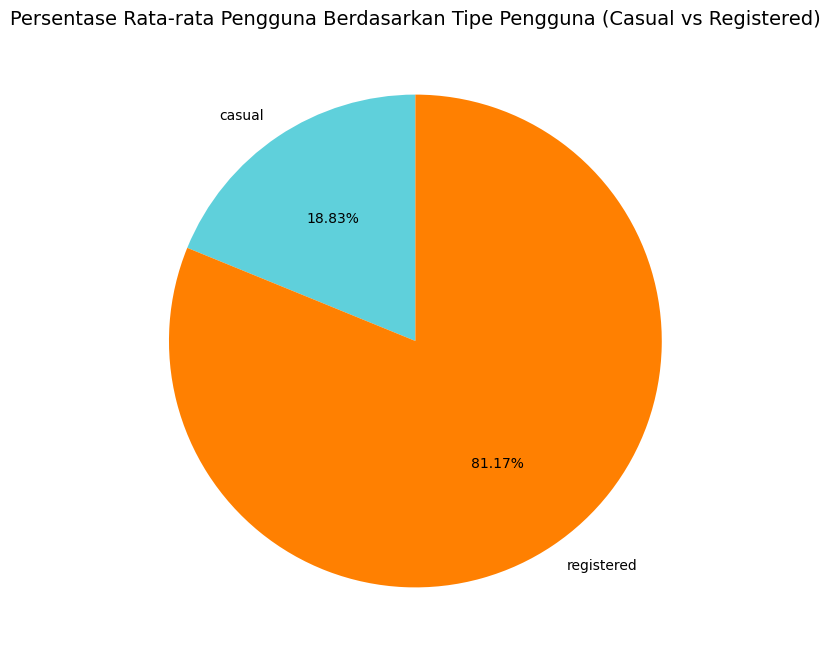

In [44]:
# Persentase Rata-rata Pengguna Berdasarkan Tipe Pengguna
user_type = day_df[['casual', 'registered']].mean()

# Menyiapkan label dan data untuk pie chart
labels = user_type.index
sizes = user_type.values

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#5fd0db', '#ff8001'])

# Menambahkan judul
plt.title('Persentase Rata-rata Pengguna Berdasarkan Tipe Pengguna (Casual vs Registered)', fontsize=14)

# Menampilkan pie chart
plt.show()

**Insight:**
- Pengguna sepeda cenderung naik-turun pada periode tertentu, tetapi berdasarkan rata-rata tahunan pengguna sepeda mengalami peningkatan.
- Pada tahun 2011, rata-rata pengguna sepeda paling banyak pada bulan Juni. Sedangkan pada tahun 2012, rata-rata pengguna sepeda paling banyak pada bulan September.
- Secara keseluruhan pada periode Januari 2011 - Desember 2012, rata-rata pengguna sepeda paling banyak ketika bulan September 2012.
- Rata-rata pengguna sepeda paling banyak pada musim gugur.
- Berdasarkan hari dalam seminggu, rata-rata jumlah pengguna sepeda cenderung merata.
- working day < non-working day.
- Tipe pengguna registered > tipe pengguna casual.


## Analisis Lanjutan (Opsional)

### Decomposition of Time Series

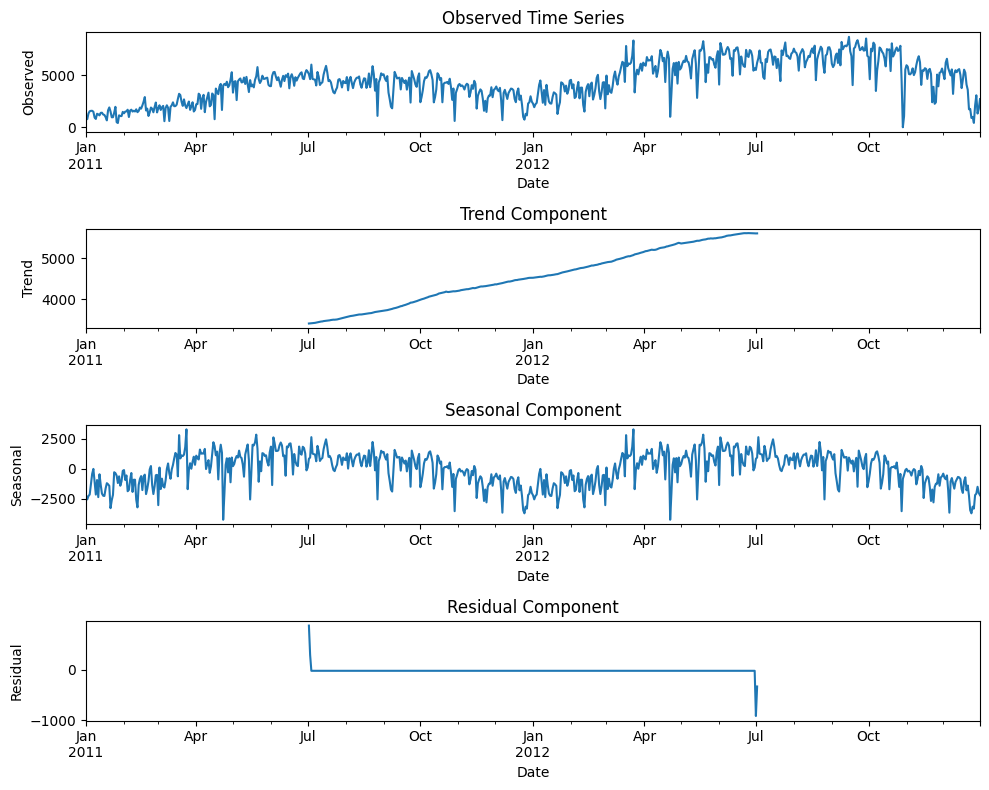

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Pastikan kolom 'dteday' adalah datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Set 'dteday' sebagai index untuk memudahkan analisis time series
day_df.set_index('dteday', inplace=True, drop=False)

# Dekomposisi Time Series untuk kolom 'cnt'
result = seasonal_decompose(day_df['cnt'], model='additive', period=365)  # Misalnya period 365 hari untuk data harian

# Plot hasil dekomposisi
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

# Observed: Data asli
result.observed.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Observed')
ax1.set_title('Observed Time Series')

# Trend: Komponen tren
result.trend.plot(ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Trend')
ax2.set_title('Trend Component')

# Seasonal: Komponen musiman
result.seasonal.plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal Component')

# Residual: Komponen residual (noise)
result.resid.plot(ax=ax4)
ax4.set_xlabel('Date')
ax4.set_ylabel('Residual')
ax4.set_title('Residual Component')

plt.tight_layout()
plt.show()

**Insight:**
Mengenai Decomposition of Time Series
- Definisi : teknik analisis yang digunakan untuk memecah data time series menjadi beberapa komponen yang lebih sederhana untuk memahami pola-pola yang ada dalam data tersebut.
- Tujuan : untuk mengidentifikasi dan memisahkan komponen-komponen yang membentuk fluktuasi dalam time series, seperti tren, musiman, dan noise (gangguan).
- Implementasi Hasil Analisis pada Periode 2011-2012
  1. Trend : jumlah rata-rata pengguna sepeda cenderung meningkat.
  2. Seasonal : ada perubahan permintaan yang terjadi secara konsisten pada waktu tertentu.
  3. Residual : model belum sepenuhnya ideal karena terdapat pola yang tidak acak.

## Conclusion

- Conclution pertanyaan 1
  1. Permintaan pengguna bike-sharing cenderung meningkat berdasarkan rata-rata jumlah pengguna tahunan.
- Conclution pertanyaan 2
  1. Jumlah rata-rata pengguna meningkat pada bulan Januari-Juni, kemudian menurun pada bulan September - Desember.
  2. Urutan pengguna sepeda paling banyak berdasarkan musim adalah musim gugur -> musim panas -> musim dingin -> musim semi.
  3. Jumlah rata-rata pengguna sepeda merata berdasarkan hari dalam seminggu.
  4. Jumlah rata-rata pengguna sepeda ketika non-working day lebih banyak dibandingkan ketika working day.
  5. Tipe pengguna registered lebih banyak daripada tipe pengguna casual.